# **<center>CLASSIFICATION OF PERSISTENCY AND NON-PERSISTENCY OF DRUGS</center>**

**Problem Statement**
* One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as
per the physician prescription.
* With an objective to gather insights on the factors that are impacting the persistency, build a
classification for the given dataset.

## **Dataset Description**
* The dataset folder contains the following files:  
Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).csv : (3425, 69)

**Columns Provided in the Dataset**

| Group | Variable | Variable Description |
| -------- | -------- | -------- |
| Unique Row Id|	Patient ID |	Unique ID of each patient |
| Target Variable |	Persistency_Flag | Flag indicating if a patient was persistent or not |
| Demographics | Age | Age of the patient during their therapy |
| Demographics | Race | Race of the patient from the patient table |
| Demographics | Region | Region of the patient from the patient table |
| Demographics | Ethnicity | Ethnicity of the patient from the patient table |
| Demographics | Gender	| Gender of the patient from the patient table |
| Demographics | IDN Indicator | Flag indicating patients mapped to IDN |
| Provider Attributes |	NTM - Physician Specialty |	Specialty of the HCP that prescribed the NTM Rx |
| Clinical Factors | NTM - T-Score | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate) |
| Clinical Factors | Change in T Score | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown) |
| Clinical Factors | NTM - Risk Segment |	Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate) |
| Clinical Factors |	Change in Risk Segment | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown) |
| Clinical Factors |	NTM - Multiple Risk | Factors	Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate) |
| Clinical Factors | NTM - Dexa Scan Frequency |	Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate) |
| Clinical Factors |	NTM - Dexa Scan Recency |	Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable) |
| Clinical Factors |	Dexa During Therapy	| Flag indicating if the patient had a Dexa Scan during their first continuous therapy |
| Clinical Factors |	NTM - Fragility Fracture Recency |	Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate) |
| Clinical Factors |	Fragility Fracture During Therapy |	Flag indicating if the patient had fragility fracture  during their first continuous therapy |
| Clinical Factors |	NTM - Glucocorticoid Recency	| Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx |
| Clinical Factors |	Glucocorticoid Usage During Therapy |	Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy |
| Disease/Treatment Factor | NTM - Injectable Experience |	Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx |
| Disease/Treatment Factor | NTM - Risk Factors	| Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx |
| Disease/Treatment Factor |	NTM - Comorbidity | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
| Disease/Treatment Factor |NTM - Concomitancy	| Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate) |
| Disease/Treatment Factor | Adherence | Adherence for the therapies |



In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Change the current directory to your desired directory path
required_directory = '/content/drive/MyDrive/Interview Related Documents/Trinity Life Science Assignment'
os.chdir(required_directory)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

## **1. DATA INGESTION**
- Collect data from various sources and prepare it for analysis. This step involves cleaning, organizing, and loading the data into a suitable format, like a DataFrame, to make it ready for exploration.
- Since, our data data is clean we don't need to perform cleaning

In [3]:
# Read csv file using pandas
file_name = 'Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx'
df = pd.read_excel(file_name, sheet_name = 'Dataset')

## **2. Exploratory Data Analysis (EDA)**
- Explore the data visually and statistically to understand its patterns, distributions, and potential outliers. EDA helps in gaining initial insights into the dataset, which informs subsequent steps.

In [4]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum().sum()

0

In [5]:
#check shape of the dataset
df.shape

(3424, 69)

In [6]:
# check columns of dataset
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

In [7]:
# Checking duplicates
df.duplicated().sum()
# drop Unnamed: 0, Address, Index from dataset
# df.drop(columns = ['Unnamed: 0', 'Address', 'Index'], inplace = True)

0

In [8]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [9]:
# For more information on the dataset like the total count in all the columns of the data
# min, max values and more information of the respective columns
#  This will only show the numeric values distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dexa_Freq_During_Rx,3424.0,3.016063,8.136545,0.0,0.0,0.0,3.0,146.0
Count_Of_Risks,3424.0,1.239486,1.094914,0.0,0.0,1.0,2.0,7.0


In [10]:
# check length of dataset
print(f" dataset length : {len(df)}")

 dataset length : 3424


In [11]:
# loop through datatset to find count of unique values of each column
for col in df.columns:
  print(f" {col} : {len(df[col].value_counts())}")

 Ptid : 3424
 Persistency_Flag : 2
 Gender : 2
 Race : 4
 Ethnicity : 3
 Region : 5
 Age_Bucket : 4
 Ntm_Speciality : 36
 Ntm_Specialist_Flag : 2
 Ntm_Speciality_Bucket : 3
 Gluco_Record_Prior_Ntm : 2
 Gluco_Record_During_Rx : 2
 Dexa_Freq_During_Rx : 58
 Dexa_During_Rx : 2
 Frag_Frac_Prior_Ntm : 2
 Frag_Frac_During_Rx : 2
 Risk_Segment_Prior_Ntm : 2
 Tscore_Bucket_Prior_Ntm : 2
 Risk_Segment_During_Rx : 3
 Tscore_Bucket_During_Rx : 3
 Change_T_Score : 4
 Change_Risk_Segment : 4
 Adherent_Flag : 2
 Idn_Indicator : 2
 Injectable_Experience_During_Rx : 2
 Comorb_Encounter_For_Screening_For_Malignant_Neoplasms : 2
 Comorb_Encounter_For_Immunization : 2
 Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx : 2
 Comorb_Vitamin_D_Deficiency : 2
 Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified : 2
 Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx : 2
 Comorb_Long_Term_Current_Drug_Therapy : 2
 Comorb_Dorsalgia : 2
 Comorb_Personal_History_Of_Other_Diseases_An

In [12]:
df['Gender'].value_counts(normalize = True)*100
# Observation: Majority of the population are female

Female    94.334112
Male       5.665888
Name: Gender, dtype: float64

In [13]:
df['Age_Bucket'].value_counts(normalize = True)*100
# Observation: Majority of the population are senior citizen

>75      42.026869
65-75    31.717290
55-65    21.407710
<55       4.848131
Name: Age_Bucket, dtype: float64

### **Correlation Matrix**
**Why?**
* A correlation matrix is a table showing correlation coefficients between variables

**There are three broad reasons for computing a correlation matrix:**

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [14]:
# Using pandas
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-14-529453c119e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,Dexa_Freq_During_Rx,Count_Of_Risks
Dexa_Freq_During_Rx,1.000000,0.013964
Count_Of_Risks,0.013964,1.000000


<ipython-input-15-288ac2be8c21>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

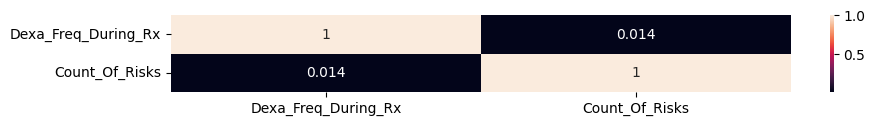

In [15]:
 #Using seaborn
plt.figure(figsize = (10,1))
sns.heatmap(df.corr(), annot = True)

**Observation:**
* Correlation is low between the two features. No need to remove any one of them.

### **CHECKING IF DATASET IS SKEWED OR NOT**
**Histogram**

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

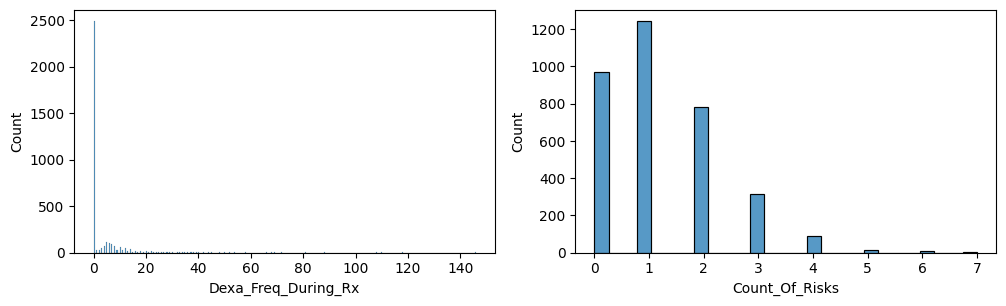

In [16]:
# Histogram using pandas
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10,3))
index = 0
ax = ax.flatten()
for col, value in df.items():
  if df[col].dtypes != 'O':
    sns.histplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### **Skewness**
* The skew method returns a scalar value representing the skewness of the distribution. A positive value indicates a positive skew (i.e., the tail on the right side of the distribution is longer), a negative value indicates a negative skew (i.e., the tail on the left side of the distribution is longer), and a value of 0 indicates that the distribution is symmetrical

In [17]:
# check skewness of dataset
df.skew(axis = 0, skipna = True)

<ipython-input-17-77a6948006c4>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


Dexa_Freq_During_Rx    6.808730
Count_Of_Risks         0.879791
dtype: float64

**CHECKING IF DATASET IS BALANCED OR NOT**

In [18]:
# check total number of fraudulent and non-fraudulent instances
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [19]:
# find Percentage of non-persistent flag
print(f"% of non-persistent flag : {round(df['Persistency_Flag'].value_counts(normalize = True)[0]*100,0)}%")

% of non-persistent flag : 62.0%


In [20]:
# find Percentage of persistent flag
print(f"% of persistent flag : {round(df['Persistency_Flag'].value_counts(normalize = True)[1]*100,0)}%")

% of persistent flag : 38.0%


* Observation: This dataset is balanced data. No need to do balancing of the data.

In [21]:
# display value_counts in categorical columns
for col in df.columns:
  if df[col].dtypes == 'O':
    print(df[col].value_counts())

P1       1
P2275    1
P2277    1
P2278    1
P2279    1
        ..
P1145    1
P1146    1
P1147    1
P1148    1
P3424    1
Name: Ptid, Length: 3424, dtype: int64
Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64
Female    3230
Male       194
Name: Gender, dtype: int64
Caucasian           3148
Other/Unknown         97
African American      95
Asian                 84
Name: Race, dtype: int64
Not Hispanic    3235
Hispanic          98
Unknown           91
Name: Ethnicity, dtype: int64
Midwest          1383
South            1247
West              502
Northeast         232
Other/Unknown      60
Name: Region, dtype: int64
>75      1439
65-75    1086
55-65     733
<55       166
Name: Age_Bucket, dtype: int64
GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                      

In [22]:
#Check frequency distribution of categorical variables
for col in df.columns:
  if df[col].dtypes == 'O':
    print(f"{round(df[col].value_counts(normalize = True)*100,1)}")

P1       0.0
P2275    0.0
P2277    0.0
P2278    0.0
P2279    0.0
        ... 
P1145    0.0
P1146    0.0
P1147    0.0
P1148    0.0
P3424    0.0
Name: Ptid, Length: 3424, dtype: float64
Non-Persistent    62.4
Persistent        37.6
Name: Persistency_Flag, dtype: float64
Female    94.3
Male       5.7
Name: Gender, dtype: float64
Caucasian           91.9
Other/Unknown        2.8
African American     2.8
Asian                2.5
Name: Race, dtype: float64
Not Hispanic    94.5
Hispanic         2.9
Unknown          2.7
Name: Ethnicity, dtype: float64
Midwest          40.4
South            36.4
West             14.7
Northeast         6.8
Other/Unknown     1.8
Name: Region, dtype: float64
>75      42.0
65-75    31.7
55-65    21.4
<55       4.8
Name: Age_Bucket, dtype: float64
GENERAL PRACTITIONER                                              44.8
RHEUMATOLOGY                                                      17.6
ENDOCRINOLOGY                                                     13.4
Unknown  

**Observation:**
1. We'll remove variables that have an uneven distribution. If variables have a distribution of 96:4 or higher, we'll drop them, as they tend to cause more misclassification and errors. This decision is based on the distribution of the 'persistancy_flag' which is distributed in a ratio of 62:38.
2. The 'Ntm_Speciality' variable has numerous levels with an imbalanced distribution. So, we'll combine levels with less than 1% frequency into a single level called 'others'.

### **Uni-Variate Analysis**

Text(0.5, 1.0, 'Count of Non-Persistent vs Persistent')

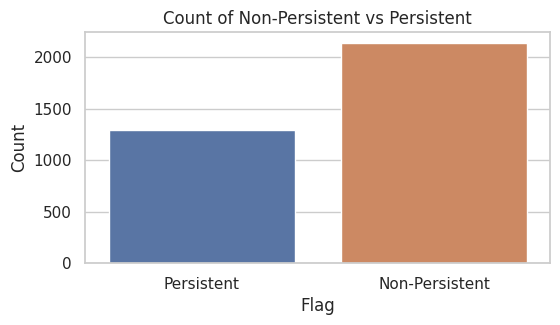

In [23]:
df["Persistency_Flag"].value_counts()
# Create the countplot using Seaborn
plt.figure(figsize=(6, 3))
sns.set(style="whitegrid")
sns.countplot(data=df, x='Persistency_Flag')
# Add labels and title
plt.xlabel('Flag')
plt.ylabel('Count')
plt.title('Count of Non-Persistent vs Persistent')

### **Bi-Variate Analysis**

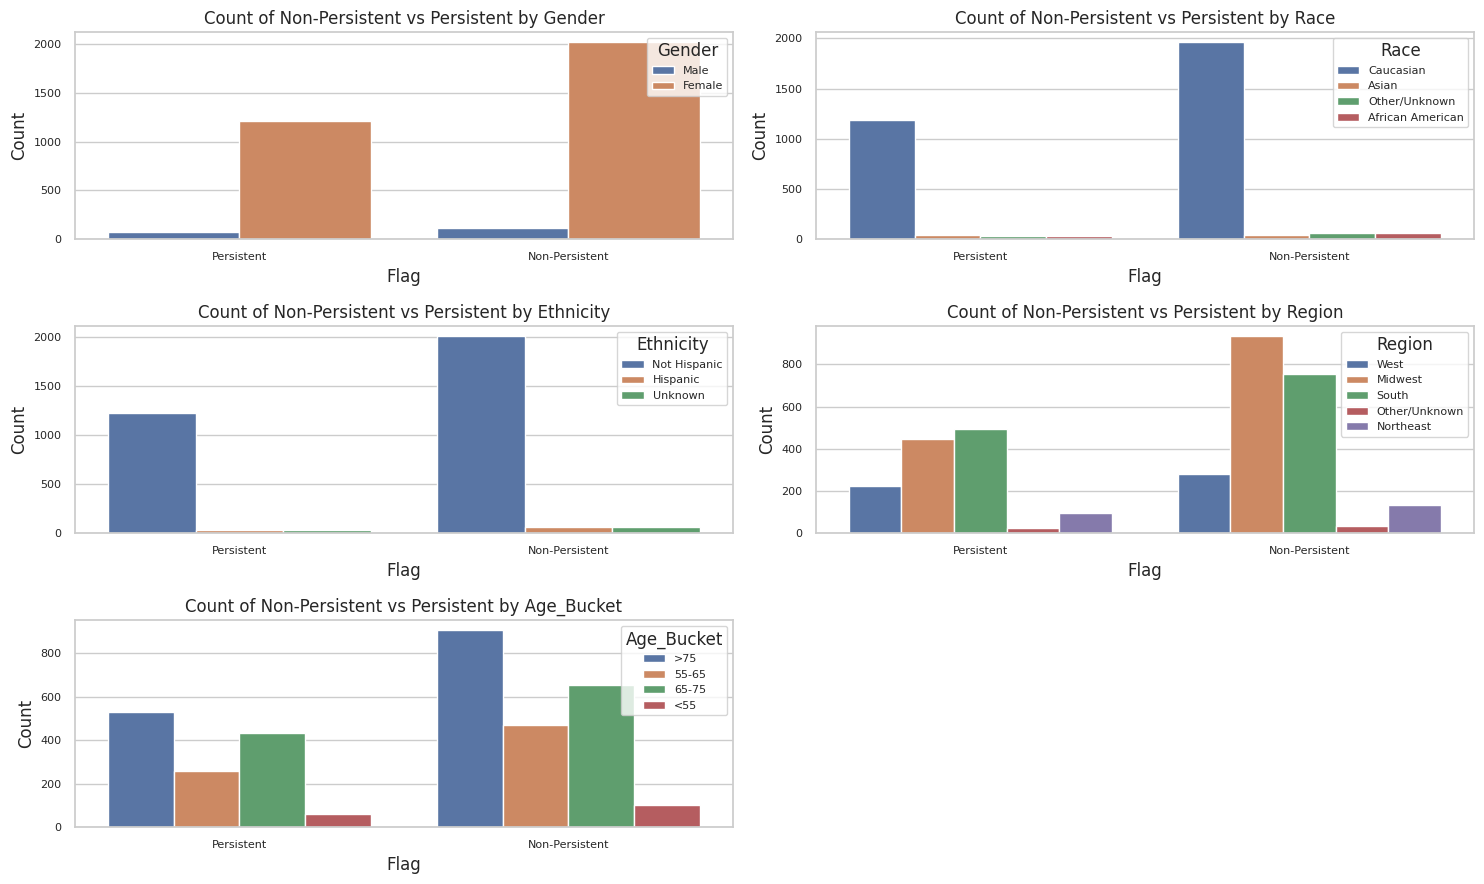

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns for hue
hue_columns = ['Gender', 'Race', 'Ethnicity', 'Region', 'Age_Bucket']  # You can add more columns as needed

# Create subplots based on the number of hue columns
num_hue_columns = len(hue_columns)
num_columns_per_row = 2
num_rows = (num_hue_columns + num_columns_per_row - 1) // num_columns_per_row  # Calculate number of rows

plt.figure(figsize=(15, 3 * num_rows))  # Adjust the figure size
sns.set(style="whitegrid")

# Loop through each hue column and create countplots
for index, hue_column in enumerate(hue_columns, start=1):
    plt.subplot(num_rows, num_columns_per_row, index)
    sns.countplot(data=df, x='Persistency_Flag', hue=hue_column)
    plt.xlabel('Flag')
    plt.ylabel('Count')
    plt.title(f'Count of Non-Persistent vs Persistent by {hue_column}')
    plt.xticks(fontsize=8, rotation=0)  # Adjust font size for x-axis tick labels and rotate
    plt.yticks(fontsize=8)  # Adjust font size for y-axis tick labels
    plt.legend(title=hue_column, loc='upper right', fontsize=8, ncol=1)  # Adjust legend font size and position

# Adjust layout with space between charts and show plots
plt.tight_layout()
plt.show()


**Observation:**
1. Almost every group has one major class and rest is minor.

## **3. DATA PREPROCESSING**
- Prepare the data for modeling by addressing missing values, scaling numerical features, and encoding categorical variables. Feature engineering might involve creating new features that capture relevant information for better model performance.



In [25]:
# Deleting the "Ptid" column because it doesn't have any significance
df.drop(columns=['Ptid'], inplace=True)

In [26]:
# Calculate frequency distribution of categorical variables
columns_to_drop = []  # To store columns to be dropped

for col in df.columns:
    if df[col].dtypes == 'O':  # Check if the column is categorical
        distribution_percentage = df[col].value_counts(normalize=True).max() * 100
        if distribution_percentage > 96:
            columns_to_drop.append(col)

print(f"Before dropping column:{len(df.columns)})")
# Drop columns with distribution greater than 96.4%
df.drop(columns=columns_to_drop, inplace=True)
print(f"Columns dropped:{columns_to_drop} and number of dropped columns: {len(columns_to_drop)}")
print(f"After dropping column:{len(df.columns)})")


Before dropping column:68)
Columns dropped:['Risk_Osteogenesis_Imperfecta', 'Risk_Rheumatoid_Arthritis', 'Risk_Untreated_Chronic_Hyperthyroidism', 'Risk_Untreated_Chronic_Hypogonadism', 'Risk_Untreated_Early_Menopause', 'Risk_Chronic_Liver_Disease', 'Risk_Low_Calcium_Intake', 'Risk_Excessive_Thinness', 'Risk_Hysterectomy_Oophorectomy', 'Risk_Estrogen_Deficiency', 'Risk_Immobilization', 'Risk_Recurring_Falls'] and number of dropped columns: 12
After dropping column:56)


In [27]:
# Calculate value counts as a percentage
value_counts_percent = df['Ntm_Speciality'].value_counts(normalize=True) * 100
# Identify values with distribution less than 1%
values_to_tag_as_other = value_counts_percent[value_counts_percent < 1].index
# Replace these values with 'Other'
df.loc[df['Ntm_Speciality'].isin(values_to_tag_as_other), 'Ntm_Speciality'] = 'Other'

### **Box plot**

* A boxplot is a standardized way of displaying the dataset based on a five-number summary:
    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.
    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.
    3. Median (Q2 or 50th percentile): the middle value of the dataset.
    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.
    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

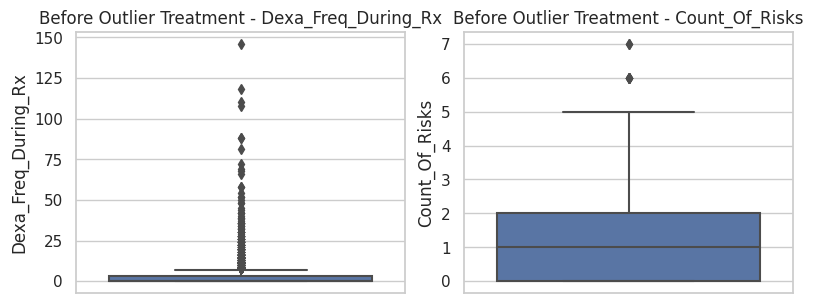

In [28]:
# Box plot for numeric columns with chart titles
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 3))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if df[col].dtypes != 'O':
        sns.boxplot(y=col, data=df, ax=ax[index])
        ax[index].set_title("Before Outlier Treatment - " + col)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

* Outliers are present. Outliers treatment is required.

In [29]:
def outlier_imputation(df, column):
    q75, q25 = np.percentile(df[column], [75, 25])
    intr_qr = q75 - q25
    max_val = q75 + (1.5 * intr_qr)
    min_val = q25 - (1.5 * intr_qr)
    df.loc[df[column] < min_val, column] = min_val
    df.loc[df[column] > max_val, column] = max_val
    return df
# Apply outlier_imputation function to specific columns
columns_to_impute = ['Dexa_Freq_During_Rx', 'Count_Of_Risks']
for column in columns_to_impute:
    df = outlier_imputation(df, column)

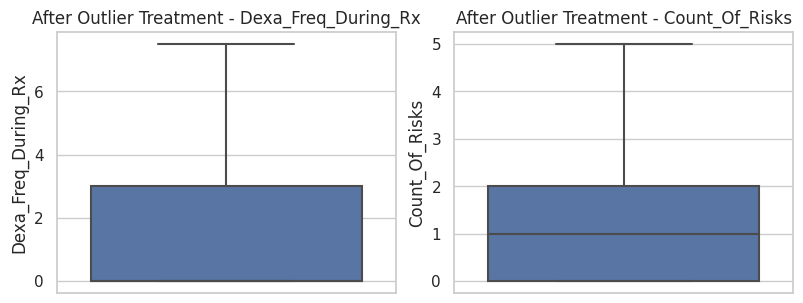

In [30]:
# Box plot for numeric columns with chart titles
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 3))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if df[col].dtypes != 'O':
        sns.boxplot(y=col, data=df, ax=ax[index])
        ax[index].set_title("After Outlier Treatment - " + col)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

### **Segregating the Independent and Dependent features**

In [31]:
## Split the labels and the target
X= df.drop(columns='Persistency_Flag')
y = df['Persistency_Flag']

#check the shape
print(X.shape)
print(y.shape)

(3424, 55)
(3424,)


### **Encoding**

In [32]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical(data):
    label_encoder = LabelEncoder()
    encoded_data = data.copy()
    if isinstance(data, pd.DataFrame):
        for column in data.columns:
            if data[column].dtype == 'object':
                encoded_data[column] = label_encoder.fit_transform(data[column])
    elif isinstance(data, pd.Series):
        if data.dtype == 'object':
            encoded_data = label_encoder.fit_transform(data)
    return encoded_data

# Assuming X is a DataFrame and y is a Series
X = label_encode_categorical(X)
y = label_encode_categorical(y)


### **Train-Test Split**

In [33]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# check the shape of train and test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2739, 55)
(685, 55)
(2739,)
(685,)


**Note:** To handle Imbalnce data, we can use the below method though our dataset is not imbalanced so we don't need to work on it
- SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.
- SMOTE - https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [34]:
# from imblearn.over_sampling import SMOTE

# # Instantiate the SMOTE class
# sm = SMOTE(sampling_strategy='minority')

# # Fit and transform the training data using SMOTE
# X_train, y_train = sm.fit_resample(X_train, y_train)

# # Print the shape of X_train after oversampling
# print("Shape of X_train after oversampling:", X_train.shape)

# # Print the shape of y_train after oversampling
# print("Shape of y_train after oversampling:", y_train.shape)


## **4. MODEL BUILDING AND SELECTION**
- Select and train machine learning models suited for the task, based on the problem type. This step involves dividing the data into training and testing sets and fine-tuning model parameters.

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Evaluation Metrics
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
# Plots
from sklearn import tree

In [36]:
# Function for calculating all the relevant metrics
"""Function to calculate all evaluation metrics"""
def evaluation(y_test,y_pred):
    Accuracy = accuracy_score(y_test, y_pred)
    conf_mat = confusion_matrix(y_test, y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Precision = true_positive /(true_positive + false_positive)
    Recall = true_positive/(true_positive + false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    AUC = roc_auc_score(y_test, y_pred)
    return Accuracy,Precision,Recall,F1_Score,AUC


In [37]:
'''All Models'''
models = {
    1: LogisticRegression(),
    2: SGDClassifier(),
    3: GaussianNB(),
    4: DecisionTreeClassifier(),
    5: RandomForestClassifier(),
    6: GradientBoostingClassifier(),
    7: AdaBoostClassifier()
}

map_keys = list(models.keys())


In [38]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss'
  if num == 3:
    return 'NaiveBayes'
  if num == 4:
    return 'DecisionTreeClassifier'
  if num == 5:
    return 'RandomForestClassifier'
  if num == 6:
    return 'GradientBoostingClassifier'
  if num == 7:
    return 'AdaBoostClassifier'
  return ''

In [39]:
results = [];
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:
    # if key in [3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    '''Test Accuracy'''
    Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, y_pred_test)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train, Precision_Train, Recall_Train, F1_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

    results.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test,
        'F1_Score_Test' : F1_Score_Test,
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train,
        'F1_Score_Train' : F1_Score_Train,
        'AUC_Train' : AUC_Train
        })

  except Exception as e:
    print(e)


1
2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3
4
5
6
7


In [40]:
pd.DataFrame(results)

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,LogisticRegression,LogisticRegression(),0.842336,0.890995,0.858447,0.874419,0.827627,0.815626,0.892586,0.826486,0.858266,0.789860
1,SGDClassifier_Hinge_Loss,SGDClassifier(),0.835036,0.909953,0.836601,0.871737,0.812391,0.810880,0.909515,0.811036,0.857457,0.777857
2,NaiveBayes,GaussianNB(),0.789781,0.767773,0.875676,0.818182,0.796434,0.789704,0.802102,0.852886,0.826715,0.785554
3,DecisionTreeClassifier,DecisionTreeClassifier(),0.712409,0.751185,0.775061,0.762936,0.700687,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.833577,0.883886,0.851598,0.867442,0.818369,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.839416,0.883886,0.859447,0.871495,0.825974,0.863454,0.934618,0.859367,0.895414,0.839629
6,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",0.827737,0.886256,0.842342,0.863741,0.810048,0.821468,0.899591,0.829386,0.863064,0.795312


**Observation:**
- The difference in how well the models perform on the training and testing data is small, usually less than 5%. However, the DecisionTreeClassifier and RandomForestClassifier show higher differences. To improve their performance, we'll adjust the hyperparameters and re-evaluate the models. We'll then choose the best model based on these evaluations.





### **Hyper parameter tunning**
* A hyperparameter is a parameter whose value is set before the learning process begins
* Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model
* Every machine learning models will have different hyperparameters that can be set

**Note:** We will try to build more robust model

In [41]:
'''Hyperparameters of Logistics Regression'''
LR_parameters = {
    'C': np.random.uniform(0.001,1,5),
    'tol':np.random.uniform(0.0001,0.1,5)
    }

'''Hyperparameters of SGD Classifier With Hinge Loss'''
SGD_parameters = {
    'penalty': ['l1','l2'],
    'alpha':np.random.uniform(0.0001,0.1,9)
    }

'''Hyperparameters of Naive Bayes'''
NB_parameters = {
    'var_smoothing': np.random.uniform(1e-16,1e-14,100)
    }

# Hyperparameters of Decision Tree Classifier
DTC_parameters = {
    'criterion': ['gini', 'entropy'],        # Testing both Gini impurity and entropy criteria
    'max_depth': [None, 10, 15, 20, 25],     # Testing a range of max_depth values
    'min_samples_split': [2, 5, 10],         # Testing different values for min_samples_split
    'min_samples_leaf': [1, 2, 4]            # Testing different values for min_samples_leaf
}

# Hyperparameters of Random Forest Classifier
RF_parameters = {
    'n_estimators': [300, 500, 600, 650, 700],  # Testing different numbers of trees
    'criterion': ['gini', 'entropy'],            # Testing both Gini and entropy criteria
    'max_depth': [None, 80, 110, 125, 135],      # Testing a range of max_depth values
    'min_samples_split': [2, 5, 10],             # Testing different values for min_samples_split
    'min_samples_leaf': [1, 2, 4]                # Testing different values for min_samples_leaf
}

# Hyperparameters of Gradient Boosted Decision Trees
# Hyperparameters of Gradient Boosted Decision Trees
GBDT_parameters = {
    'n_estimators': [100, 250, 350, 500],       # Testing different numbers of trees
    'criterion': ['friedman_mse'],              # Using 'friedman_mse' criterion
    'max_depth': [3, 4, 5],                      # Testing different values for max_depth
    'learning_rate': [0.01, 0.1, 0.2],           # Testing different learning rates
    'subsample': [0.8, 0.9, 1.0]                 # Testing different subsample ratios
}


'''Hyperparameters of AdaBoost Classifier'''
AB_parameters = {
    'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]
    }

'''All Models'''
models = {
1 : RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = LR_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
2 : RandomizedSearchCV(estimator = SGDClassifier(), param_distributions = SGD_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
3 : RandomizedSearchCV(estimator = GaussianNB(), param_distributions = NB_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
4 : RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions = DTC_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
5 : RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = RF_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
6 : RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = GBDT_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5),
7 : RandomizedSearchCV(estimator = AdaBoostClassifier(), param_distributions = AB_parameters, scoring= 'f1',verbose=2, n_jobs = -1, cv=5)

}

map_keys = list(models.keys())

In [42]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression_Tuned'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss_Tuned'
  if num == 3:
    return 'NaiveBayes_Tune'
  if num == 4:
    return 'DecisionTreeClassifier_Tuned'
  if num == 5:
    return 'RandomForestClassifier_Tuned'
  if num == 6:
    return 'GradientBoostingClassifier_Tuned'
  if num == 7:
    return 'AdaBoostClassifier_Tuned'
  return ''

In [43]:
results_tuned = []
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:
    # if key in [3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train, y_train)


    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    '''Test Accuracy'''
    Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, y_pred_test)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train)

    Accuracy_Train, Precision_Train, Recall_Train, F1_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

    results_tuned.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test,
        'F1_Score_Test' : F1_Score_Test,
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train,
        'F1_Score_Train' : F1_Score_Train,
        'AUC_Train' : AUC_Train
        })

  except Exception as e:
    print(e)


1
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
3
Fitting 5 folds for each of 10 candidates, totalling 50 fits
4
Fitting 5 folds for each of 10 candidates, totalling 50 fits
5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
6
Fitting 5 folds for each of 10 candidates, totalling 50 fits
7
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [44]:
pd.DataFrame(results_tuned)

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,LogisticRegression_Tuned,"RandomizedSearchCV(cv=5, estimator=LogisticReg...",0.842336,0.890995,0.858447,0.874419,0.827627,0.815261,0.892586,0.826040,0.858025,0.789373
1,SGDClassifier_Hinge_Loss_Tuned,"RandomizedSearchCV(cv=5, estimator=SGDClassifi...",0.824818,0.933649,0.810700,0.867841,0.791920,0.804673,0.940455,0.788160,0.857599,0.759214
2,NaiveBayes_Tune,"RandomizedSearchCV(cv=5, estimator=GaussianNB(...",0.789781,0.767773,0.875676,0.818182,0.796434,0.789704,0.802102,0.852886,0.826715,0.785554
3,DecisionTreeClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=DecisionTre...",0.762044,0.819905,0.799076,0.809357,0.744553,0.891201,0.950379,0.884302,0.916151,0.871389
4,RandomForestClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=RandomFores...",0.836496,0.890995,0.850679,0.870370,0.820022,0.933552,0.972563,0.925042,0.948207,0.920492
5,GradientBoostingClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=GradientBoo...",0.826277,0.862559,0.856471,0.859504,0.815310,0.964951,0.993579,0.952434,0.972571,0.955366
6,AdaBoostClassifier_Tuned,"RandomizedSearchCV(cv=5, estimator=AdaBoostCla...",0.836496,0.886256,0.853881,0.869767,0.821455,0.824754,0.896089,0.835602,0.864789,0.800871


**Observation:**
- We noticed that the models named DecisionTreeClassifier_Tuned and RandomForestClassifier_Tuned are fitting too closely to the training data. To make them better, we'll work on the model before training, by picking the most important features and making sure the data is scaled properly.

### **Data Pre-Processing for model improvement**

<ipython-input-45-9227fe3ff4c5>:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

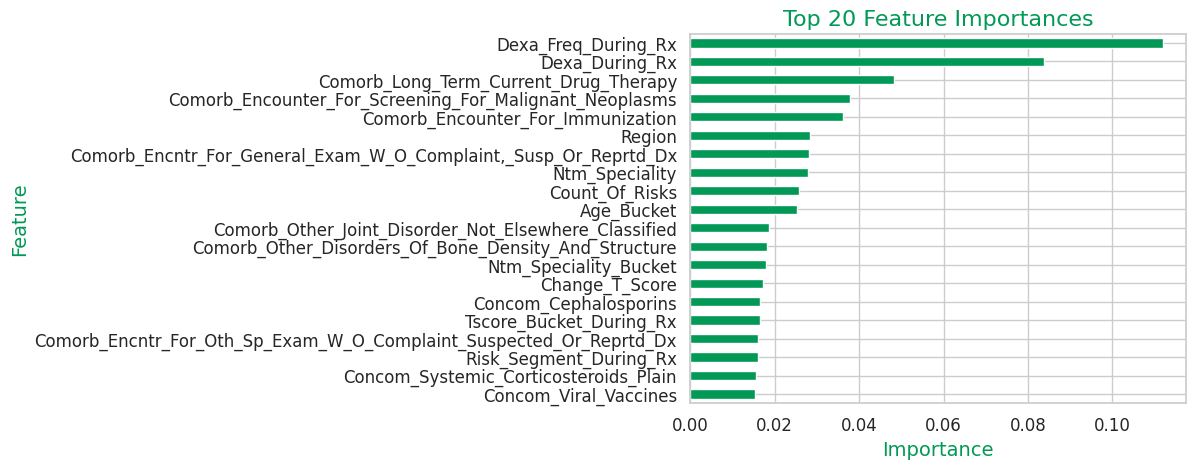

In [45]:
# Checking feature importance
# Fit a random forest classifier to get feature importances
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Checking feature importance
feature_importance_ = pd.DataFrame({'Importance': rf_classifier.feature_importances_}, index=X.columns)
top_features = feature_importance_.sort_values(by='Importance', ascending=False)[:20]

# Plotting the top feature importances in a horizontally spread chart
plt.figure(figsize=(10, 8))
top_features.sort_values(by='Importance', ascending=True).plot(kind='barh', color='#019955')
plt.xlabel("Importance", color="#019955", fontsize=14)
plt.ylabel("Feature", color="#019955", fontsize=14)
plt.title("Top 20 Feature Importances", color="#019955", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend().set_visible(False)
plt.tight_layout()
plt.show()


**Observation:**
- We're choosing the most important 20 features from our dataset. We have 68 columns in our data, so we didn't set a specific limit to remove columns. Instead, we're focusing on the top 20 features that matter the most.

In [46]:
X_train_New = X_train[top_features.index]
X_test_New = X_test[top_features.index]

In [47]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression_Tuned2'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss_Tuned2'
  if num == 3:
    return 'NaiveBayes_Tuned2'
  if num == 4:
    return 'DecisionTreeClassifier_Tuned2'
  if num == 5:
    return 'RandomForestClassifier_Tuned2'
  if num == 6:
    return 'GradientBoostingClassifier_Tuned2'
  if num == 7:
    return 'AdaBoostClassifier_Tuned2'
  return ''

In [48]:
results_tuned2 = []
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:
    # if key in [3,4,5,6,7,8]:
    model = models[key]
    print(key)
    model.fit(X_train_New, y_train)


    y_pred_train = model.predict(X_train_New)
    y_pred_test = model.predict(X_test_New)

    '''Test Accuracy'''
    Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, y_pred_test)

    '''Train Accuracy'''
    y_pred_train = model.predict(X_train_New)

    Accuracy_Train, Precision_Train, Recall_Train, F1_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

    results_tuned2.append({
        'Model Name' : get_model_building_technique_name(key),
        'Trained Model' : model,
        'Accuracy_Test' : Accuracy_Test,
        'Precision_Test' : Precision_Test,
        'Recall_Test' : Recall_Test,
        'F1_Score_Test' : F1_Score_Test,
        'AUC_Test' : AUC_Test,
        'Accuracy_Train' : Accuracy_Train,
        'Precision_Train' : Precision_Train,
        'Recall_Train' : Recall_Train,
        'F1_Score_Train' : F1_Score_Train,
        'AUC_Train' : AUC_Train
        })

  except Exception as e:
    print(e)


1
Fitting 5 folds for each of 10 candidates, totalling 50 fits
2
Fitting 5 folds for each of 10 candidates, totalling 50 fits
3
Fitting 5 folds for each of 10 candidates, totalling 50 fits
4
Fitting 5 folds for each of 10 candidates, totalling 50 fits
5
Fitting 5 folds for each of 10 candidates, totalling 50 fits
6
Fitting 5 folds for each of 10 candidates, totalling 50 fits
7
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [49]:
results_tuned2_df = pd.DataFrame(results_tuned2)
results_tuned2_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,LogisticRegression_Tuned2,"RandomizedSearchCV(cv=5, estimator=LogisticReg...",0.824818,0.883886,0.840090,0.861432,0.806962,0.806864,0.896089,0.813892,0.853015,0.776992
1,SGDClassifier_Hinge_Loss_Tuned2,"RandomizedSearchCV(cv=5, estimator=SGDClassifi...",0.818978,0.789100,0.904891,0.843038,0.828010,0.787514,0.785756,0.862268,0.822236,0.788102
2,NaiveBayes_Tuned2,"RandomizedSearchCV(cv=5, estimator=GaussianNB(...",0.817518,0.824645,0.872180,0.847747,0.815364,0.787514,0.823117,0.834813,0.828924,0.775594
3,DecisionTreeClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=DecisionTre...",0.781022,0.848341,0.806306,0.826790,0.760673,0.902519,0.946877,0.902113,0.923953,0.887668
4,RandomForestClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=RandomFores...",0.829197,0.895735,0.838137,0.865979,0.809084,0.864184,0.942207,0.855326,0.896667,0.838062
5,GradientBoostingClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=GradientBoo...",0.824818,0.860190,0.856132,0.858156,0.814125,0.863454,0.932283,0.860916,0.895179,0.840410
6,AdaBoostClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=AdaBoostCla...",0.837956,0.898104,0.847875,0.872267,0.819775,0.814531,0.900175,0.820649,0.858575,0.785858


## **5. MODEL EVALUATION AND INTERPRETATION**
- Evaluate the trained models using appropriate metrics to assess their performance. Interpret the model results to understand which factors influence predictions and whether the model aligns with real-world expectations.

**ROC Curve**
* The overall performance of a classifier, summarized over all possible thresholds, is given by the Receiver Operating Characteristics (ROC) curve. The name “ROC” is historical and comes from communications theory. ROC Curves are used to see how well your classifier can separate positive and negative examples and to identify the best threshold for separating them.
* To be able to use the ROC curve, your classifier should be able to rank examples such that the ones with higher rank are more likely to be positive (fraudulent)
* ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

**AUC (Area Under the Curve)**
* The model performance is determined by looking at the area under the ROC curve (or AUC). An excellent model has AUC near to the 1.0, which means it has a good measure of separability

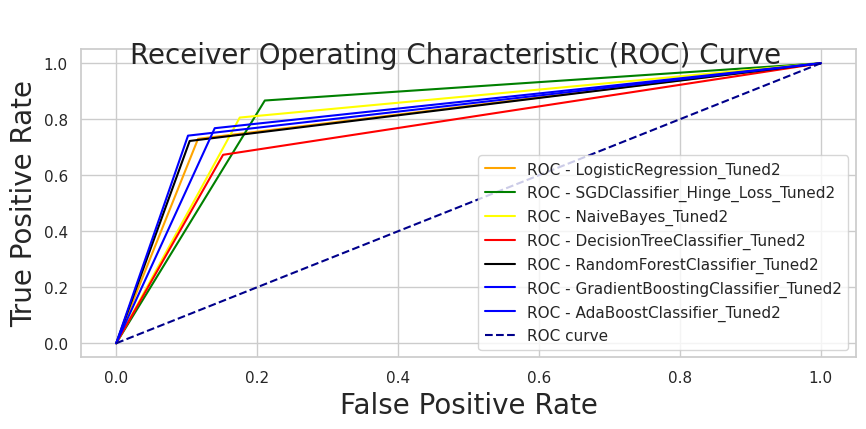

In [50]:
fpr_dict = {}
tpr_dict = {}
for i in range(len(map_keys)):

    model_pred = results_tuned2_df['Trained Model'][i].predict(X_test_New)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr

plt.figure(figsize=(10,4))
plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.plot(fpr_dict[0], tpr_dict[0], color='orange', label=f"ROC - {results_tuned2_df['Model Name'][0]}")
plt.plot(fpr_dict[1], tpr_dict[1], color='green', label=f"ROC - {results_tuned2_df['Model Name'][1]}")
plt.plot(fpr_dict[2], tpr_dict[2], color='yellow', label=f"ROC - {results_tuned2_df['Model Name'][2]}")
plt.plot(fpr_dict[3], tpr_dict[3], color='red', label=f"ROC - {results_tuned2_df['Model Name'][3]}")
plt.plot(fpr_dict[4], tpr_dict[4], color='black', label=f"ROC - {results_tuned2_df['Model Name'][4]}")
plt.plot(fpr_dict[5], tpr_dict[5], color='blue', label=f"ROC - {results_tuned2_df['Model Name'][5]}")
plt.plot(fpr_dict[6], tpr_dict[6], color='blue', label=f"ROC - {results_tuned2_df['Model Name'][6]}")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})
plt.legend()
plt.show()

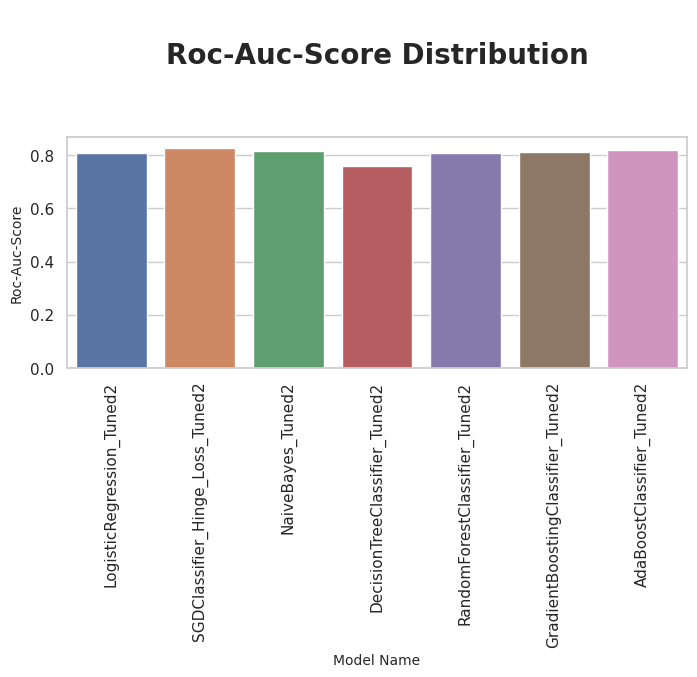

In [51]:
plt.figure(figsize=(8,3))
plt.title('\nRoc-Auc-Score Distribution\n\n', fontsize=20, fontweight='bold')
sns.barplot(data=results_tuned2_df, x='Model Name', y='AUC_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 10})
plt.ylabel('Roc-Auc-Score',fontdict={'fontsize': 10})
plt.xticks(rotation=90)
plt.show()

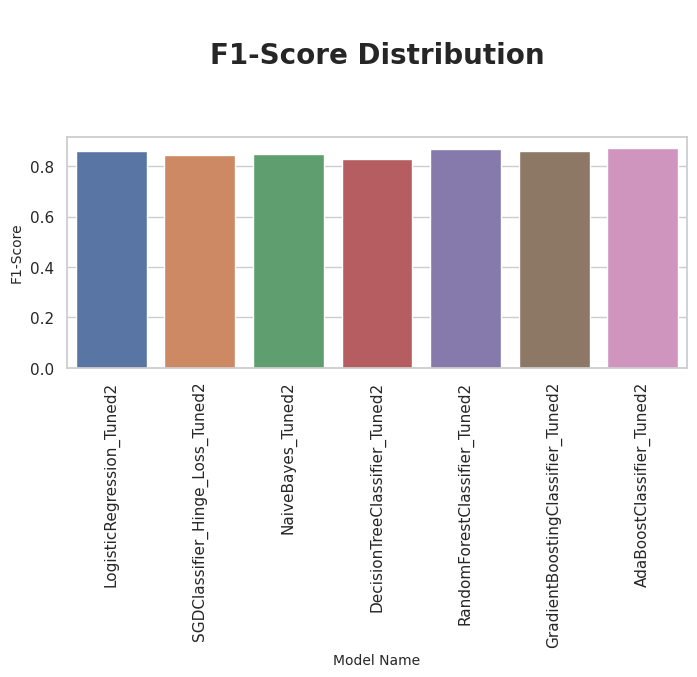

In [52]:
plt.figure(figsize=(8,3))
plt.title('\nF1-Score Distribution\n\n', fontsize=20, fontweight='bold')
sns.barplot(data=results_tuned2_df, x='Model Name', y='F1_Score_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 10})
plt.ylabel('F1-Score',fontdict={'fontsize': 10})
plt.xticks(rotation=90)
plt.show()

In [53]:
Best_Model_Name = results_tuned2_df['Trained Model'][results_tuned2_df[results_tuned2_df['F1_Score_Test'] == max(results_tuned2_df['F1_Score_Test'])]['Trained Model'].index[0]]
Best_Model_Index = results_tuned2_df['Trained Model'][results_tuned2_df[results_tuned2_df['F1_Score_Test'] == max(results_tuned2_df['F1_Score_Test'])]['Trained Model'].index].index[0]
Best_Model_Name

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'n_estimators': [400, 600, 650, 700,
                                                         750, 800]},
                   scoring='f1', verbose=2)

In [54]:
results_tuned2_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Score_Train,AUC_Train
0,LogisticRegression_Tuned2,"RandomizedSearchCV(cv=5, estimator=LogisticReg...",0.824818,0.883886,0.840090,0.861432,0.806962,0.806864,0.896089,0.813892,0.853015,0.776992
1,SGDClassifier_Hinge_Loss_Tuned2,"RandomizedSearchCV(cv=5, estimator=SGDClassifi...",0.818978,0.789100,0.904891,0.843038,0.828010,0.787514,0.785756,0.862268,0.822236,0.788102
2,NaiveBayes_Tuned2,"RandomizedSearchCV(cv=5, estimator=GaussianNB(...",0.817518,0.824645,0.872180,0.847747,0.815364,0.787514,0.823117,0.834813,0.828924,0.775594
3,DecisionTreeClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=DecisionTre...",0.781022,0.848341,0.806306,0.826790,0.760673,0.902519,0.946877,0.902113,0.923953,0.887668
4,RandomForestClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=RandomFores...",0.829197,0.895735,0.838137,0.865979,0.809084,0.864184,0.942207,0.855326,0.896667,0.838062
5,GradientBoostingClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=GradientBoo...",0.824818,0.860190,0.856132,0.858156,0.814125,0.863454,0.932283,0.860916,0.895179,0.840410
6,AdaBoostClassifier_Tuned2,"RandomizedSearchCV(cv=5, estimator=AdaBoostCla...",0.837956,0.898104,0.847875,0.872267,0.819775,0.814531,0.900175,0.820649,0.858575,0.785858


## **Saving Best Model Model and Pre-Processed dataset**

In [56]:
import pickle

# Save the best model using pickle
with open('PERSISTENT_NON_PERSISTENT_CLASSIFICATION.sav', 'wb') as best_model_pickle:
    pickle.dump(Best_Model_Name, best_model_pickle)

# Convert NumPy arrays to DataFrames
X_train_New_df = pd.DataFrame(X_train_New)
y_train_df = pd.DataFrame(y_train)
X_test_New_df = pd.DataFrame(X_test_New)
y_test_df = pd.DataFrame(y_test)

# Concatenate DataFrames
train_preprocessed_1 = pd.concat([X_train, y_train_df], axis=1)
test_preprocessed_1 = pd.concat([X_test, y_test_df], axis=1)
train_preprocessed_2 = pd.concat([X_train_New_df, y_train_df], axis=1)
test_preprocessed_2 = pd.concat([X_test_New_df, y_test_df], axis=1)

# Save train_preprocessed_1 dataframe
train_preprocessed_1.to_csv('train_preprocessed_1.csv', index=False)
# Save test_preprocessed_1 dataframe
test_preprocessed_1.to_csv('test_preprocessed_1.csv', index=False)
# Save train_preprocessed_2 dataframe
train_preprocessed_2.to_csv('train_preprocessed_2.csv', index=False)
# Save test_preprocessed_2 dataframe
test_preprocessed_2.to_csv('test_preprocessed_2.csv', index=False)


## **BEST MODEL VALIDATION**

In [58]:
# Load the pickled model
with open('PERSISTENT_NON_PERSISTENT_CLASSIFICATION.sav', 'rb') as model_pickle:
    loaded_model = pickle.load(model_pickle)

# Predict on new data (X_test_New)
predictions = loaded_model.predict(X_test_New)
'''Test Accuracy'''
Accuracy_Test, Precision_Test, Recall_Test, F1_Score_Test, AUC_Test =  evaluation(y_test, predictions)

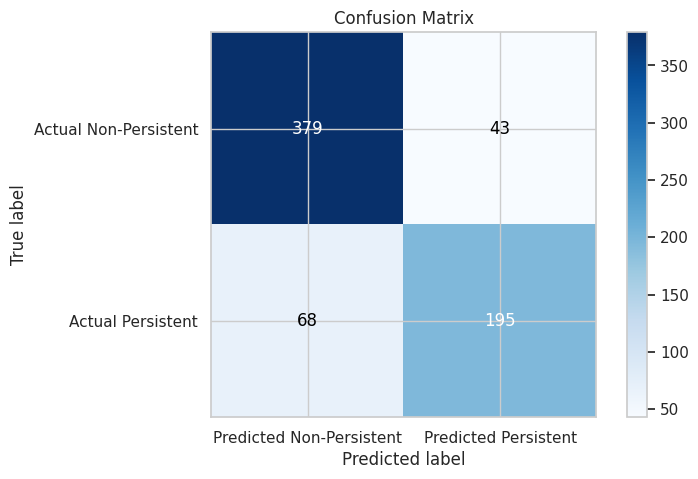

In [59]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Predicted Non-Persistent', 'Predicted Persistent'],
       yticklabels=['Actual Non-Persistent', 'Actual Persistent'],
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Annotate the confusion matrix cells with counts
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


In [60]:
#Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       422
           1       0.82      0.74      0.78       263

    accuracy                           0.84       685
   macro avg       0.83      0.82      0.83       685
weighted avg       0.84      0.84      0.84       685



## **Conclusion**
* After training and predicting with various models, we have chosen the AdaBoostClassifier as our final model due to its superior performance among the options.
* Throughout the process, we conducted Exploratory Data Analysis (EDA), preprocessing, built multiple models, visualized the significance of features, fine-tuned hyperparameters, and made predictions.
* To enhance the model's robustness, we utilized the RandomForestClassifier for feature importance assessment and standardized the data using the StandardScaler, followed by hyperparameter tuning.
We have incorporated evaluation metrics, preprocessed dataset and the analysis tab into the [Project Report](https://docs.google.com/spreadsheets/d/1ArZqlSqfGojT2WrlN1fPMzh4GfLo1MM6053ISKLEHHs/edit?usp=sharing) spreadsheet.

# **<center> THE END </center>**